In [96]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np
import pandas as pd
import seaborn as sns


In [386]:
markers=list(range(1,6))
str_markers = [str(m) for m in markers]
notes={"Manon":[3,3,2,3,4,3,2],
       "Romane":[4,4,3,3,2,3,3],
       "Enzo":[2,3,4,4,4,3,4],
       "Marylou":[3,2,3,3,4,3,2],
      }
df=pd.DataFrame(notes).T
labels=df.columns=['Écriture', 'Organisation', 'Syntaxe', 'Vocabulaire', 'Imagination','Conjugaison','Orthographe']
df


,Écriture,Organisation,Syntaxe,Vocabulaire,Imagination,Conjugaison,Orthographe
Manon,3,3,2,3,4,3,2
Romane,4,4,3,3,2,3,3
Enzo,2,3,4,4,4,3,4
Marylou,3,2,3,3,4,3,2


In [389]:
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
cAngles = np.concatenate((angles,[angles[0]]))

def make_radar_chart(i):
    name=df.index[i]
    stats=df.iloc[i].values
    cStats = np.concatenate((stats,[stats[0]]))
    
    for i in markers:
        ax.plot(cAngles, [i for c in cStats], '--', linewidth=1,color="black",alpha=0.25)
    ax.plot(cAngles, cStats, 'o-', linewidth=3,color=color)
    ax.fill(angles, stats, alpha=0.25,color=color)
    for angle in angles:
        ax.plot([angle,angle],[0,1.05*max(markers)],"--",color="black",linewidth=1,alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_rlabel_position(0)  # Move radial labels away from the original angle
    ax.set_rticks([1, 2, 3, 4, 5],[1, 2, 3, 4, 5])
    for label, angle in zip(ax.get_xticklabels(), angles): # boucle qui change l'alignement des étiquettes en fonction du côté
        if angle==0 or angle==np.pi:
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('right')
        else:
            label.set_horizontalalignment('left')    
    plt.yticks(markers)
    ax.set_title(name,y=1.12,weight='bold') # y règle la distance entre le titre et la figure
    ax.grid(False)
    ax.spines['polar'].set_visible(False)
    return 

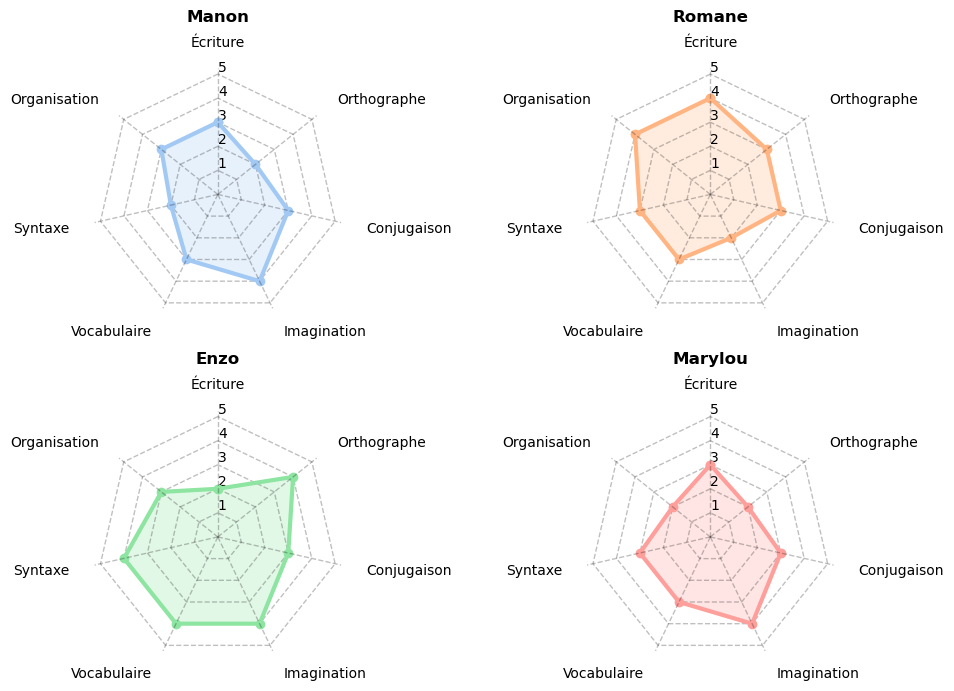

In [390]:
palette=iter(sns.color_palette("pastel",10))
fig = plt.figure(figsize=(10,7))
for i in range(len(df)):
    ax=fig.add_subplot(221+i, polar=True)
    ax.set_theta_zero_location('N')
    color=next(palette)
    make_radar_chart(i) # example
plt.tight_layout()
plt.savefig("radar-exemple.png",bbox_inches="tight")
plt.show()

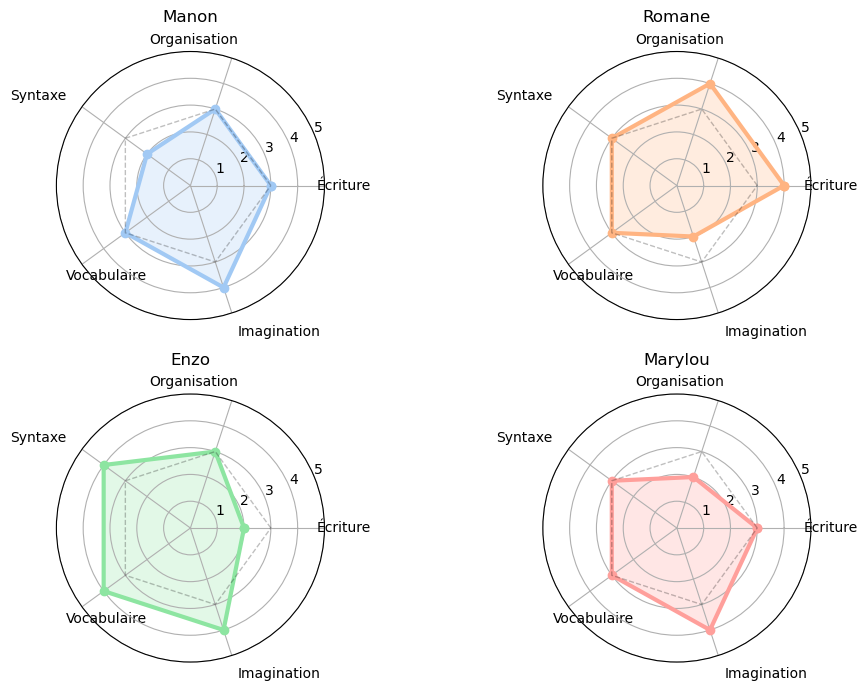

In [300]:
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
cAngles = np.concatenate((angles,[angles[0]]))
palette=iter(sns.color_palette("pastel",10))

def make_radar_chart(i):
    name=df.index[i]
    stats=df.iloc[i].values
    cStats = np.concatenate((stats,[stats[0]]))
    
    ax.plot(cAngles, cStats, 'o-', linewidth=3,color=color)
    ax.plot(cAngles, [3 for c in cStats], '--', linewidth=1,color="black",alpha=0.25)
    ax.fill(angles, stats, alpha=0.25,color=color)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    for label, angle in zip(ax.get_xticklabels(), angles): # boucle qui change l'alignement des étiquettes en fonction du côté
      if np.pi/2 < angle < 3*np.pi/2:
        label.set_horizontalalignment('right')
      else:
        label.set_horizontalalignment('left')
    plt.yticks(markers)
    ax.set_title(name,y=1.08) # y règle la distance entre le titre et la figure
    ax.grid(True)
    return 

    
fig = plt.figure(figsize=(10,7))
for i in range(len(df)):
    ax=fig.add_subplot(221+i, polar=True)
    color=next(palette)
    make_radar_chart(i) # example
plt.tight_layout()
plt.savefig("radar-exemple.png",bbox_inches="tight")
plt.show()

In [190]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` Axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding Axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        # def _gen_axes_spines(self):
        #     if frame == 'circle':
        #         return super()._gen_axes_spines()
        #     elif frame == 'polygon':
        #         # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
        #         spine = Spine(axes=self,
        #                       spine_type='circle',
        #                       path=Path.unit_regular_polygon(num_vars))
        #         # unit_regular_polygon gives a polygon of radius 1 centered at
        #         # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
        #         # 0.5) in axes coordinates.
        #         spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
        #                             + self.transAxes)
        #         return {'polar': spine}
        #     else:
        #         raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [191]:
def example_data():
    # The following data is from the Denver Aerosol Sources and Health study.
    # See doi:10.1016/j.atmosenv.2008.12.017
    #
    # The data are pollution source profile estimates for five modeled
    # pollution sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical
    # species. The radar charts are experimented with here to see if we can
    # nicely visualize how the modeled source profiles change across four
    # scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolyzed Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase species is present...
    # "Manon":[3,3,2,3,4],
    #    "Romane":[4,4,3,3,2],
    #    "Enzo":[2,3,4,4,4],
    #    "Marylou":[3,2,3,3,4],
    data = [
        ['Écriture', 'Organisation', 'Syntaxe', 'Vocabulaire', 'Imagination'],
        ('Manon', [
            [3,3,2,3,4],[3,2,3,3,4],[3,3,3,3,4]
        ]
        ),
        ('Romane', [
            [4,4,3,3,2],[_,_,_,_,_],[4,3,3,3,3]
        ]),
        ('Enzo', [
            [_,_,_,_,_],[2,3,4,4,4],[_,_,_,_,_]]),
        ('Marylou', [
            [_,_,_,_,_],[_,_,_,_,_],[3,2,3,3,4]])
    ]
    return data

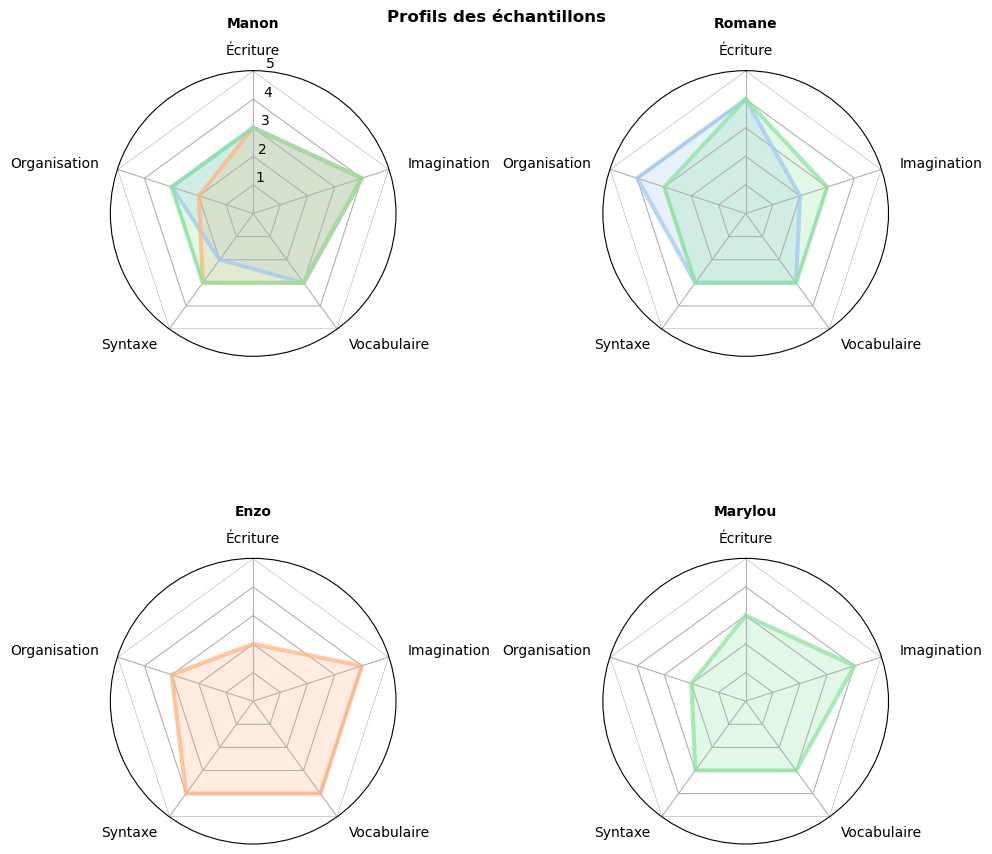

In [218]:
if __name__ == '__main__':
    N = 5
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop(0)

    fig, axs = plt.subplots(figsize=(10, 10), nrows=2, ncols=2,
                            subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = sns.color_palette("pastel",10)
    # Plot the four cases from the example data on separate Axes
    for ax, (title, case_data) in zip(axs.flat, data):
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 0),y=1.12,
                     horizontalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color,linewidth=3,alpha=0.75)
            ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
        ax.set_varlabels(spoke_labels)
        for label, angle in zip(ax.get_xticklabels(), angles): # boucle qui change l'alignement des étiquettes en fonction du côté
            if angle==0 or angle==np.pi:
                label.set_horizontalalignment('center')
            elif 0 < angle < np.pi:
                label.set_horizontalalignment('right')
            else:
                label.set_horizontalalignment('left')
        ax.set_rgrids([1,2,3,4,5])
        ax.set_rticks([1, 2, 3, 4, 5])
        ax.set_rlabel_position(-5)  # Move radial labels away from the original angle
        plt.yticks(markers)

    # add legend relative to top-left plot
    # labels = ('Échantillon 1', 'Échantillon 2', 'Échantillon 3', 'Échantillon 4', 'Échantillon 5')
    # legend = axs[0, 0].legend(labels, loc=(-0.3, .95),
    #                           labelspacing=0.1, fontsize='small')

    fig.text(0.5, 0.91, 'Profils des échantillons',
             horizontalalignment='center', color='black', weight='bold',
             size='large')
    plt.tight_layout()
    plt.show()